In [41]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import html
from collections import Counter
import pandas as pd
import re
import matplotlib.pyplot as plt

In [42]:
pd.set_option('display.max_row', 10)
df = pd.read_csv('../website_classification.csv')
df.tail(10)

,website_url,cleaned_website_text,Category
952,http://dumpsmabiyscb7ilk75z4cql7rxokimdrtbnfib...,request timeoutrequest timeoutserver timeout w...,Financial Crime
953,http://plasticwrevezcuvtt6aj2bl3xx5q4x4wm2ptlf...,request timeoutrequest timeoutserver timeout w...,Financial Crime
954,http://ccpalymn3bi5uctrujnvrp5lf2nmyqf37oykanp...,request timeoutrequest timeoutserver timeout w...,Financial Crime
955,http://imperiacfwnxzhkpyce2ifxwdf3zromko5wwrba...,request timeoutrequest timeoutserver timeout w...,Financial Crime
956,http://acteam2mf2ubo5hapf2dgsj4h7kjembfy4c6pml...,request timeoutrequest timeoutserver timeout w...,Financial Crime
957,http://blackstgivygqcitkvmi6qwta3fpxhaakdjbhfe...,request timeoutrequest timeoutserver timeout w...,Financial Crime
958,http://ccvendoqij2gteltjdd64usgdparw6kq2c2aqgm...,request timeoutrequest timeoutserver timeout w...,Financial Crime
959,https://ascarding.com/,the carding asylumcarding forum hacking forum ...,Financial Crime
960,https://ascarding.com/forums/16/,cardable sites the carding asylumcardable site...,Financial Crime
961,https://ascarding.com/forums/19/,bank carding the carding asylumbank carding go...,Financial Crime


In [43]:
from bs4 import BeautifulSoup
import bs4 as bs4
from urllib.parse import urlparse
import requests
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os


class ScrapTool:   
    def visit_url(self,website_url):
        '''
        Visit URL. Download the Content. Initialize the beautifulsoup object. Call parsing methods. Return Series object.
        '''
        #Set up Selenium webdriver
        PATH = 'C:/Users/User01/Downloads/chromedriver_win32/chromedriver.exe'

        # Set the Chrome webdriver options
        chrome_options = Options()
        chrome_options.add_argument("--headless")
        # Initialize the Chrome webdriver and pass the Chrome options
        service = Service(PATH)
        driver = webdriver.Chrome(service = service, options = chrome_options)

        #Load website
        driver.get(website_url)
        
        # Check if the cookie consent button is present
        cookie_button = None
        try:
            cookie_button = WebDriverWait(driver, 15).until(EC.element_to_be_clickable((By.CSS_SELECTOR, "cookie-consent-button")))
        except:
            pass

        # Handle cookies if the button is present
        if cookie_button:
            cookie_button.click()

        # Extract HTML content
        html_content = driver.page_source
        driver.quit()

        soup = BeautifulSoup(html_content,'lxml')
        result = {
            "website_url": website_url,
            "website_name": self.get_website_name(website_url),
            "website_text": self.get_html_title_tag(soup)+self.get_html_meta_tags(soup)+self.get_html_heading_tags(soup)+
                                    self.get_text_content(soup)
        }
        
        #Convert to Series object and return
        return pd.Series(result)
    
    def get_website_name(self,website_url):
        '''
        Example: returns "google" from "www.google.com"
        '''
        return "".join(urlparse(website_url).netloc.split(".")[-2])
    
    def get_html_title_tag(self,soup):
        '''Return the text content of <title> tag from a webpage'''
        return '. '.join(soup.title.contents)
    
    def get_html_meta_tags(self,soup):
        '''Returns the text content of <meta> tags related to keywords and description from a webpage'''
        tags = soup.find_all(lambda tag: (tag.name=="meta") & (tag.has_attr('name') & (tag.has_attr('content'))))
        content = [str(tag["content"]) for tag in tags if tag["name"] in ['keywords','description']]
        return ' '.join(content)
    
    def get_html_heading_tags(self,soup):
        '''returns the text content of heading tags. The assumption is that headings might contain relatively important text.'''
        tags = soup.find_all(["h1","h2","h3","h4","h5","h6"])
        content = [" ".join(tag.stripped_strings) for tag in tags]
        return ' '.join(content)
    
    def get_text_content(self,soup):
        '''returns the text content of the whole page with some exception to tags. See tags_to_ignore.'''
        tags_to_ignore = ['style', 'script', 'head', 'title', 'meta', '[document]',"h1","h2","h3","h4","h5","h6","noscript"]
        tags = soup.find_all(string=True)
        result = []
        for tag in tags:
            stripped_tag = tag.strip()
            if tag.parent.name not in tags_to_ignore\
                and isinstance(tag, bs4.element.Comment)==False\
                and not stripped_tag.isnumeric()\
                and len(stripped_tag)>0:
                result.append(stripped_tag)
        return ' '.join(result)

In [44]:
def cleaning_text(text):
    text = html.unescape(text)
    text = re.sub(r'[^a-zA-Z0-9\s\'-]', '', text)
    tokens = text.split()
    tokens = [token for token in tokens if not token.isdigit()]
    cleaned_text = ' '.join(tokens).lower()
    return cleaned_text

In [45]:
def content_generation(website):
    try:
        scrapTool = ScrapTool()
        web = scrapTool.visit_url(website)
        text = cleaning_text(web['website_text'])
        return text
    except Exception as e:
        print('Error: ',website)
        print(e)
        return None

In [46]:
websites = [
    'https://cardingleaks.ws/forums/carding-documents.31/',
    'https://cardingleaks.ws/forums/carding-methods.82/',
    'https://cardingleaks.ws/forums/carding-discussion-desk.58/',
    'https://cardingleaks.ws/forums/free-cvv-fullz-dumps-track.74/',
    'https://cardingleaks.ws/forums/carding-tutorials.13/',
    'https://cardingleaks.ws/forums/cc-gen-cc-checker.109/',
    'https://cardingleaks.ws/forums/cardable-websites.12/',
    'https://carding.store/classifieds/item/6-carding-training-with-a-guaranteed-income/',
    'https://carding.store/classifieds/item/29-5-cvv-credit-card-cashout-methods-4000%C2%A3day-100-working-2021-easy/',
    'https://carding.store/classifieds/item/28-the-best-13-carding-videos-10000-per-day-with-2021-method-mega-bonus/'
]

for website in websites:
    try:
        content = content_generation(website)
        content_list = [website,content,"Financial Crime"]
        df.loc[len(df)] = content_list
    except Exception as e:
        print(website,": ",e)


In [47]:
df['Category'].value_counts()

Computers and Technology           302
Social Networking and Messaging    114
Business/Corporate                 106
E-Commerce                         101
News                                93
Law and Government                  83
Narcotics                           74
Adult                               43
Financial Crime                     40
Forums                              16
Name: Category, dtype: int64

In [50]:
df[df["Category"]=="Financial Crime"]

,website_url,cleaned_website_text,Category
932,https://blackbones.net/,black bones cardingblack bones forum carding h...,Financial Crime
933,https://en.wikipedia.org/wiki/Carding_(fraud)#,carding fraud - wikipediacontents carding frau...,Financial Crime
934,https://club2crd.cc/forumdisplay.php?f=54,sell cc cvv - clubcrd carding forumsell cc cvv...,Financial Crime
935,https://club2crd.cc/showthread.php?p=652434#po...,carding forum carding forum atm hacking tupkin...,Financial Crime
936,https://club2crd.cc/showthread.php?t=11791,carding forum carding forum atm hacking tupkin...,Financial Crime
...,...,...,...
967,https://cardingleaks.ws/forums/cc-gen-cc-check...,cc gen cc checker cvv dumps fullz onlyfans lea...,Financial Crime
968,https://cardingleaks.ws/forums/cardable-websit...,cardable websites cvv dumps fullz onlyfans lea...,Financial Crime
969,https://carding.store/classifieds/item/6-cardi...,carding training with a guaranteed income - se...,Financial Crime
970,https://carding.store/classifieds/item/29-5-cv...,cvv credit card cashout methods day working ea...,Financial Crime


In [49]:
df.loc[df["Category"] == "Financial Crime", "cleaned_website_text"] = df.loc[df["Category"] == "Financial Crime", "cleaned_website_text"].apply(
    lambda x: re.sub(r'\d+', '', x)
)


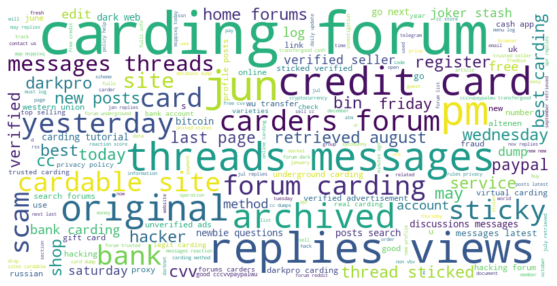

In [48]:
from wordcloud import WordCloud

category_name = "Financial Crime"
category_data = df[df["Category"]==category_name]['cleaned_website_text']
category_text = ' '.join(category_data)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

important_words = wordcloud.words_.keys()


In [49]:
df.to_csv("website_classification.csv",index=False)
# computers.to_csv("../Hierarchal model/Computer/computer_subcategory_classification.csv",index=False)